In this component, you are going to look around to find the business you are interested in. It might be a hardware store in the corner, an ice cream shop, a street vendor, an online discussion board, anything you want to record information and play with. You are going to follow exactly the same steps we did in Module 4:



## 1. Think carefully about the business, describe a clear background story of the business.

Ryan is the proprietor of ActiveGear, a local sporting goods store that has been a staple in the community for over a decade. Recognizing the inefficiencies of the traditional paper-based filing system, Ryan has sought to modernize his operations by implementing a Relational Database Management System (RDBMS). At ActiveGear, customers can find a wide range of sporting equipment, apparel, and accessories catering to various sports and outdoor activities. Ryan aims to streamline the process of managing customer information, inventory, sales transactions, store lcoations, and employee data through the implementation of an RDBMS. This transition will not only enhance the efficiency of day-to-day operations but also provide valuable insights into customer preferences, inventory trends, and sales performance, allowing ActiveGear to better serve its clientele and maintain its position as a leading provider of sporting goods in the community.

## 2. Make sufficient assumptions, and create the ER model.

Entities:
- Stores: StoreID, StoreName, Location, Contact
- Employees: EmployeeID, SSN, Name, Gender, DoB, Position, Salary, AffiliateStore
- Inventory: StoreID, ProductID, StockLevel, CustomerID (FK), Field, TotalAmount, PaymentMethod
- Vendors: VendorID, Address, Contact, VendorName
- Products: ProductsID, Price, Quantity, Description, ProductName
- Transactions: TransactionsID (PK), Date, Time, CustomerID(FK), Field, TotalAmount, PaymentMethod
- Product_Transaction: TransactionID (PK), ProductID, Quantity

Relationships:
- Stores may have 1 or more employees; A employee belongs to one store
- Stores may have 1 or more inventories; an inventory belongs to one store
- Vendors have 1 or more products; and products belong to one inventory An employee must have one and only one (exactly one) supervisor; A staff may supervise one or more (zero or more) staff.
- Products must have 1 and only one (exactly one) inventory; an inventory may stock one or more (zero or more) products.
- Products must have one and only one (exactly one) Product_transaction; A Product_transaction may include one or more (zero or more) Products
- Transactions must have one and only one (exactly one) Product_Transaction; a Product_transaction may include one or more (zero or more) Transactions.





## 3. From the ER model, create the ERD.

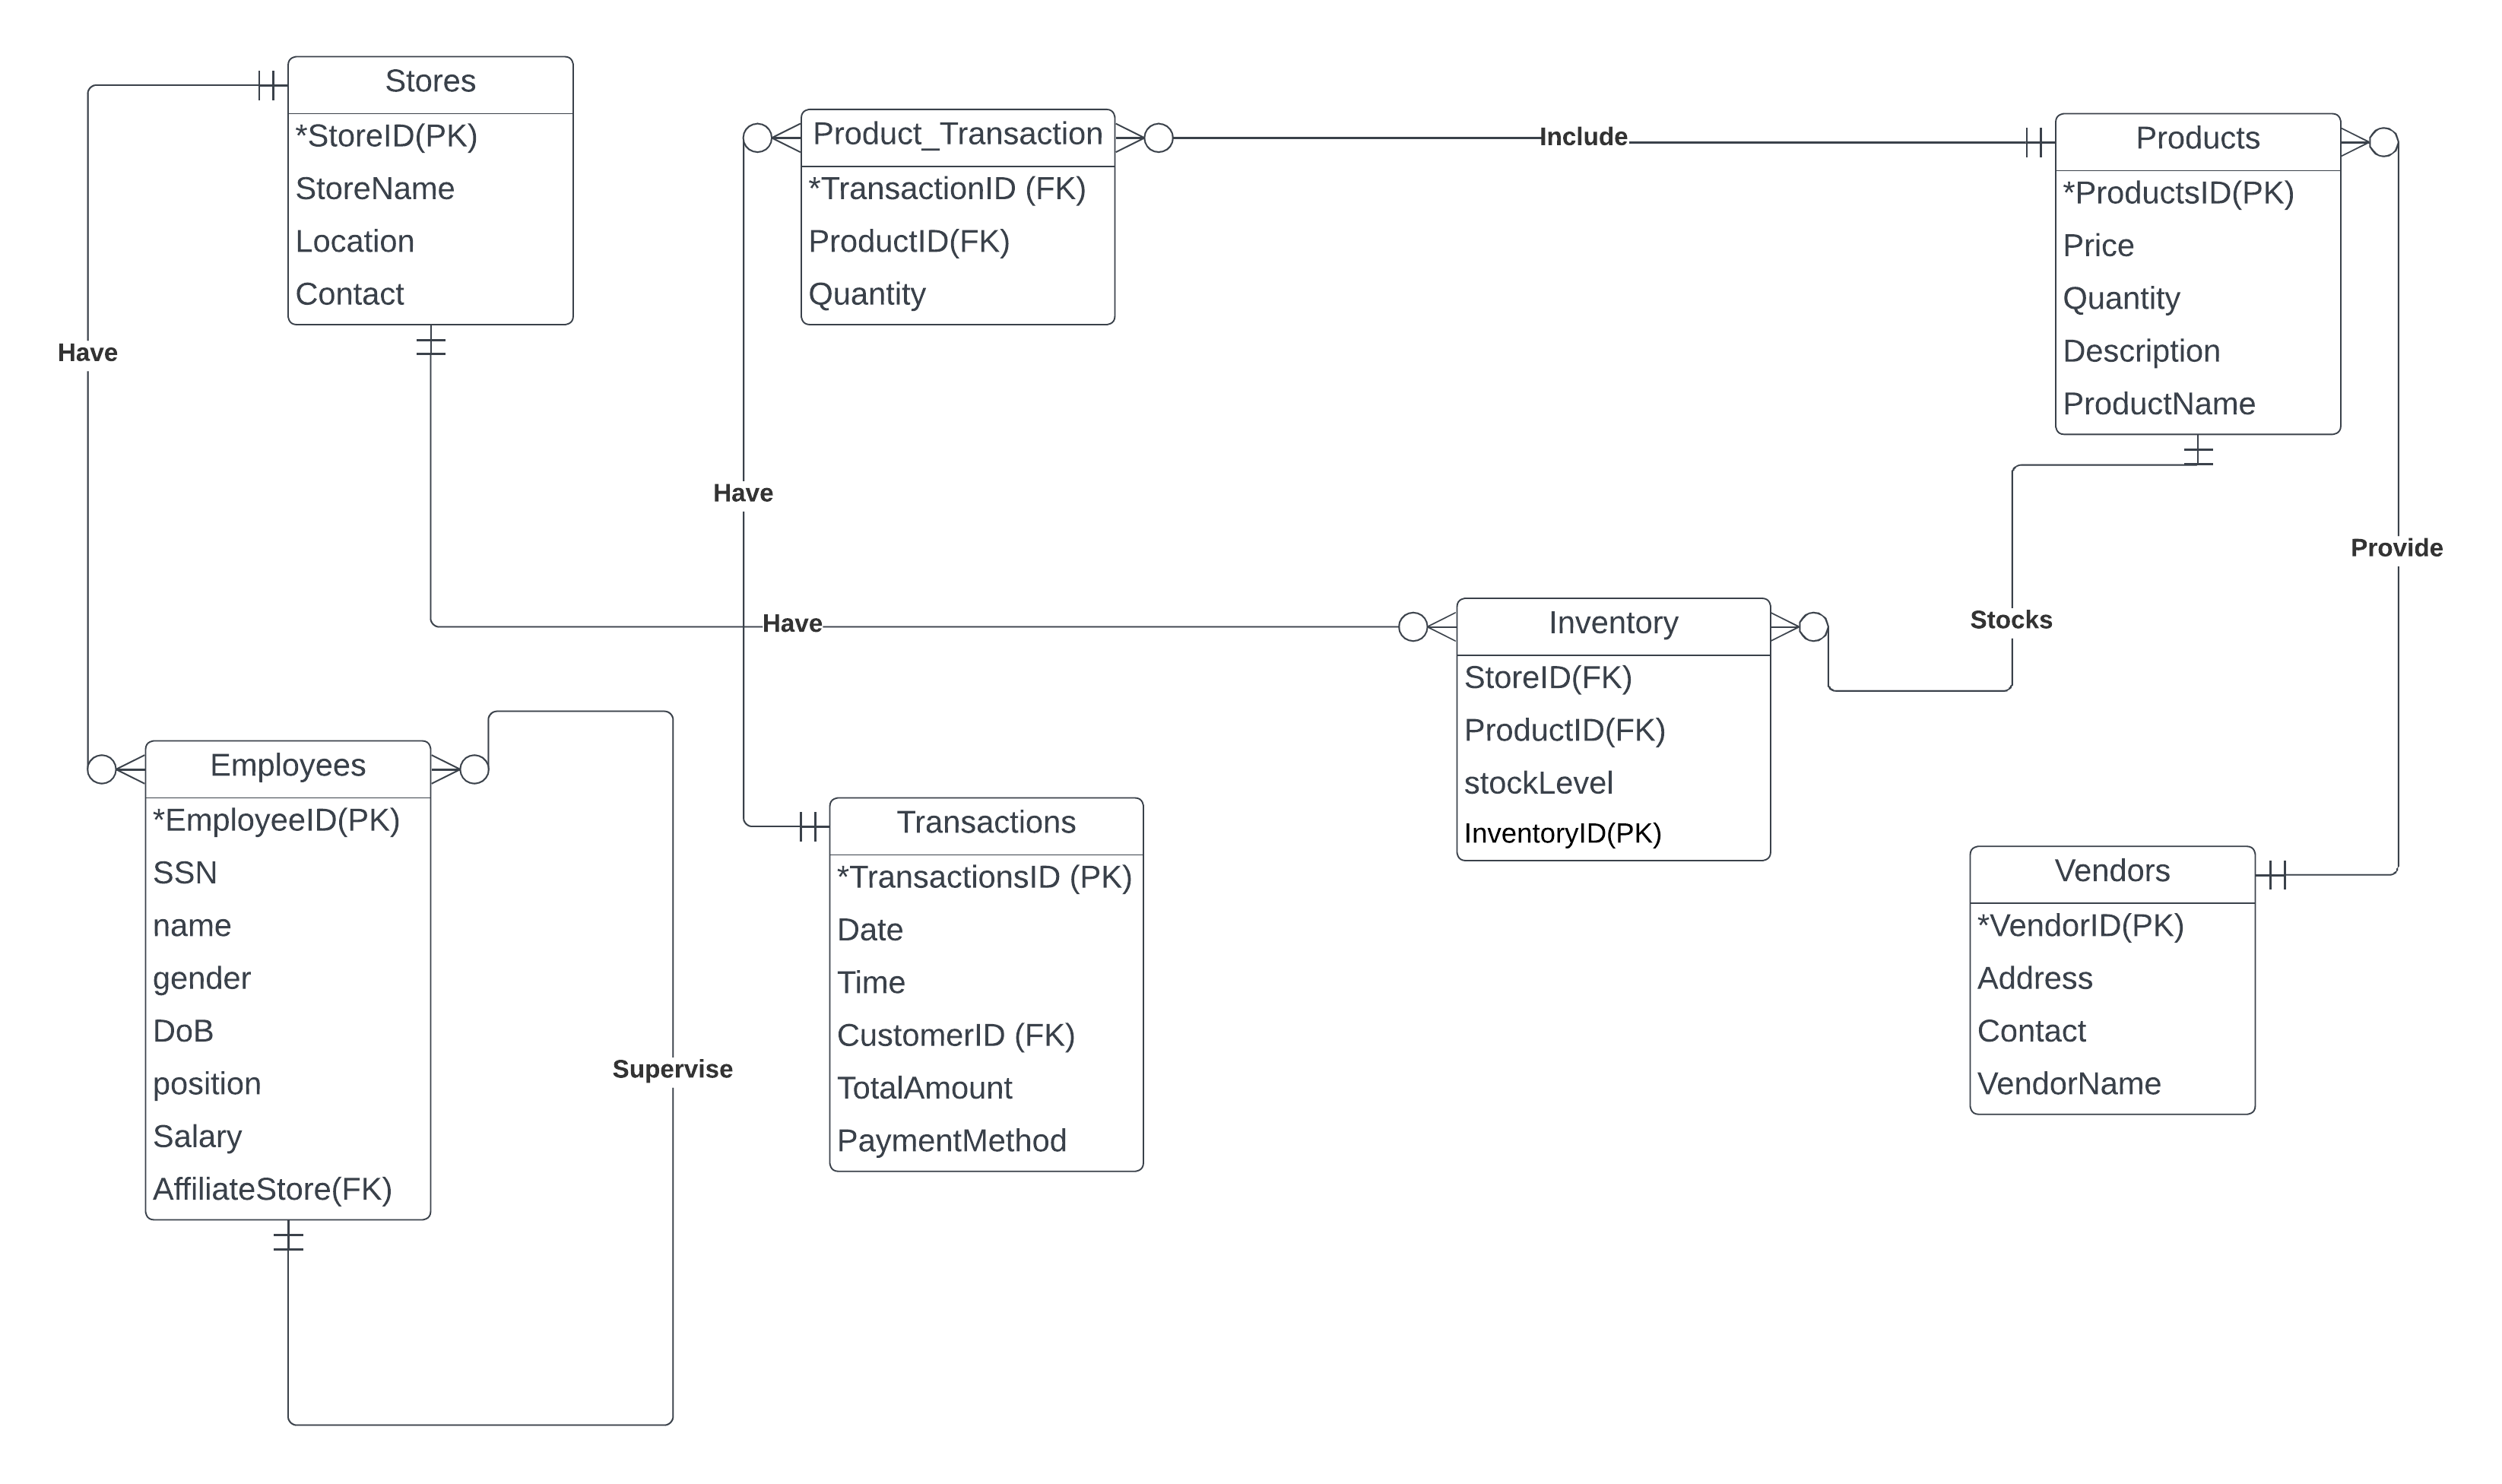

In [9]:
from IPython.display import Image
Image(filename="ERD Final(1).png")

## 4. Relational Model

- Stores: StoreID (PK), StoreName, Location, Contact
- Employees: EmployeeID (PK), SSN, Name, Gender, DoB (Date of Birth), Position, Salary, AffiliateStore (FK referencing Stores.StoreID)
- Inventory: InventoryID (PK), StoreID (FK referencing Stores.StoreID), ProductID (FK referencing Products.ProductID), StockLevel
- Vendors: VendorID (PK), Address, Contact, VendorName
- Products: ProductsID (PK), Price, Quantity, Description, ProductName
- Transactions: TransactionsID (PK), Date, Time, CustomerID (FK), TotalAmount, PaymentMethod
- Product_Transaction: TransactionID (FK referencing Transactions.TransactionsID), ProductID (FK referencing Products.ProductsID), Quantity


## 5. Normalization to the Third Normal Form (3NF) 
1. Stores - Already in 3NF: StoreID is the PK and all other attributes depend only on the PK.
2. Employees Assuming - AffiliateStore references `StoreID` from the Stores table, and there are no transitive dependencies (ex. Salary does not depend on Position, and Position does not depend on StoreID), this table is in 3NF.
3. Inventory - Is in 3NF: All attributes are dependent on the PK, and there are no transitive dependencies.
4. Vendors - This table is in 3NF as all non-key attributes solely depend on the PK.

5. Products
   - This table needs attention. If `Quantity` refers to the amount of the product available, it should not be in the Products table as the quantity can change and is not an intrinsic attribute of the product. The quantity would be better placed in the Inventory table.
   - After moving `Quantity` to Inventory, the Products table is in 3NF.

6. Transactions
   - This table might also need attention. If `TotalAmount` is a derived field that sums the amounts from the Product_Transaction table, it should not be stored in the Transactions table to satisfy 3NF. Instead, it should be calculated when needed.
   - After addressing `TotalAmount`, the Transactions table would be in 3NF.

7. Product_Transaction - In 3NF: It's a junction table that connects Products and Transactions. All attributes are dependent on the composite key (TransactionID, ProductID).

Here are the changes needed:

- Move `Quantity` from Products to Inventory.
- Consider calculating `TotalAmount` in Transactions on-the-fly instead of storing it if it's derived from other data.


## 6. Finalize the relational model in 3NF for further implementation.

Normalization to the Third Normal Form (3NF) involves ensuring that a relational model is in Second Normal Form (2NF) and also ensuring that all non-key attributes are non-transitively dependent on the primary key. This means that there should be no dependencies on non-key attributes.

Tables:

1. Stores
   - Already in 3NF: StoreID is the PK and all other attributes depend only on the PK.

2. Employees
   - Assuming `AffiliateStore` accurately references `StoreID` from the Stores table, and there are no transitive dependencies (e.g., Salary does not depend on Position, and Position does not depend on StoreID), this table is in 3NF.

3. Inventory
   - Appears to be in 3NF: All attributes are dependent on the PK, and there are no transitive dependencies.

4. Vendors
   - This table is in 3NF as all non-key attributes solely depend on the PK.

5. Products
   - This table needs attention. If `Quantity` refers to the amount of the product available, it should not be in the Products table as the quantity can change and is not an intrinsic attribute of the product. The quantity would be better placed in the Inventory table.
   - After moving `Quantity` to Inventory, the Products table is in 3NF.

6. Transactions
   - This table might also need attention. If `TotalAmount` is a derived field that sums the amounts from the Product_Transaction table, it should not be stored in the Transactions table to satisfy 3NF. Instead, it should be calculated when needed.
   - After addressing `TotalAmount`, the Transactions table would be in 3NF.

7. Product_Transaction
   - In 3NF: It's a junction table that connects Products and Transactions. All attributes are dependent on the composite key (TransactionID, ProductID).

Here are the changes needed:

- Move `Quantity` from Products to Inventory.
- Consider calculating `TotalAmount` in Transactions on-the-fly instead of storing it if it's derived from other data.

After these adjustments, the relational model should be in 3NF. Keep in mind that while normalization to 3NF is often beneficial for reducing redundancy and improving data integrity, in some cases, denormalization might be used intentionally for performance optimizations, such as when frequent complex calculations are required.
